# **Post Processing Analysis of the model to provide insights into the role of features.**

       Feature  Importance
6         A_OS    0.192969
8      B_HOMO+    0.118261
10        B_OS    0.103158
15     B_HOMO-    0.070503
7         A_X-    0.063286
11        B_X-    0.050238
5         A_X+    0.049616
4   B_e_affin+    0.049516
14       B_IE+    0.047704
2   B_e_affin-    0.046024
1   B_Z_radii+    0.045770
0            μ    0.040317
12          μĀ    0.029010
16       B'_OS    0.027621
9        A_IE-    0.026447
13  A_e_affin+    0.022231
3            t    0.017330

🔹 Evaluating Model Performance 🔹
Mean Absolute Error (MAE): 0.2004
Mean Squared Error (MSE): 0.1132
Root Mean Squared Error (RMSE): 0.3365
R-squared (R²): 0.8334
Mean Absolute Percentage Error (MAPE): 14.35%

🔹 Plotting Feature Importance 🔹


<ipython-input-8-a74cdf47decb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


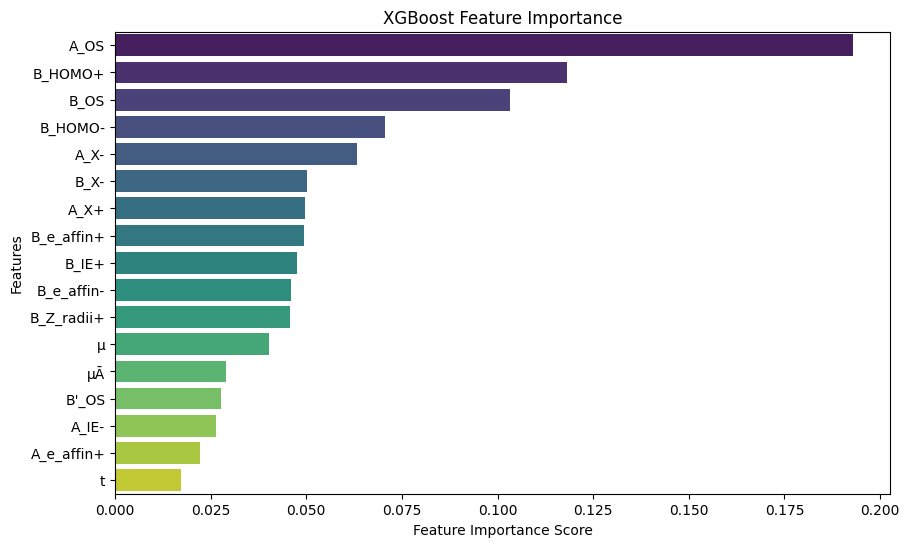


🔹 Plotting Residual Distribution 🔹


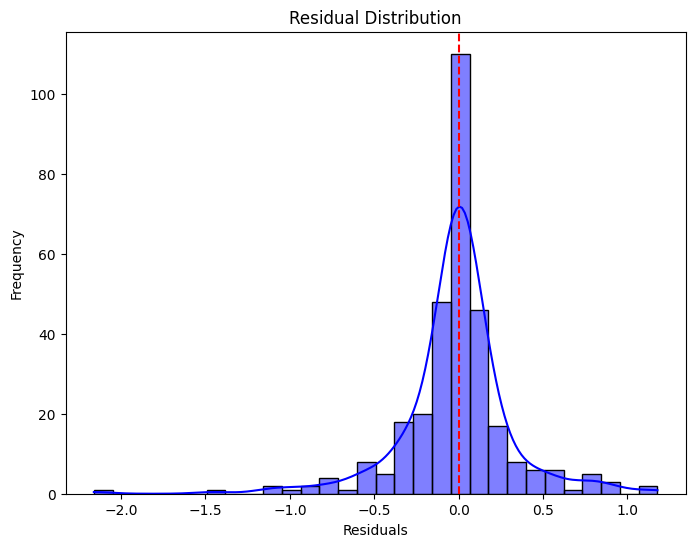


🔹 Plotting Actual vs. Predicted Band Gap 🔹


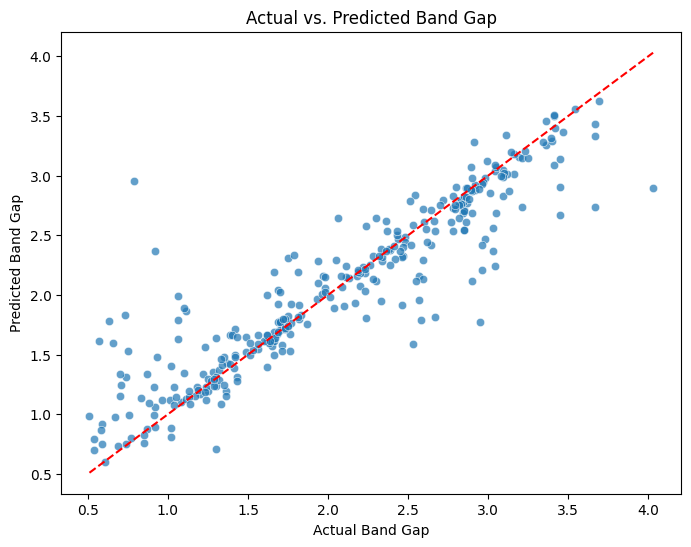


🔹 Plotting Residuals vs A_OS 🔹


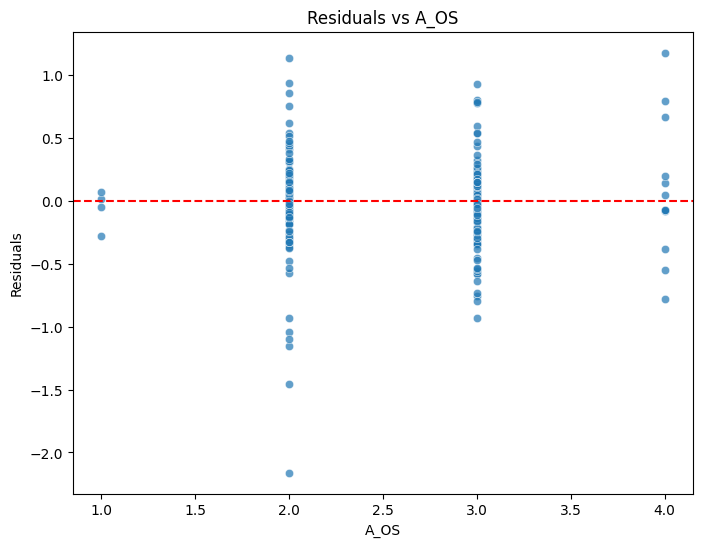

In [8]:
#Post-Processing Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature Importance Analysis
def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("XGBoost Feature Importance")
    plt.show()

# Residual Analysis
def plot_residual_distribution(y_test, y_pred):
    residuals = y_test - y_pred

    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True, color='blue')
    plt.axvline(x=0, color='red', linestyle="--")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residual Distribution")
    plt.show()

# Actual vs. Predicted Plot
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
    plt.xlabel("Actual Band Gap")
    plt.ylabel("Predicted Band Gap")
    plt.title("Actual vs. Predicted Band Gap")
    plt.show()

# Error Distribution by Feature
def plot_residuals_vs_feature(df, feature_name, y_test, y_pred):
    residuals = y_test - y_pred

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature_name], y=residuals, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle="--")
    plt.xlabel(feature_name)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs {feature_name}")
    plt.show()

# Model Evaluation Metrics
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Post-Processing Analysis
def run_post_processing(model, X, y_test, y_pred, df, feature_to_analyze):
    print("\n🔹 Evaluating Model Performance 🔹")
    evaluate_model(y_test, y_pred)

    print("\n🔹 Plotting Feature Importance 🔹")
    plot_feature_importance(model, X.columns)

    print("\n🔹 Plotting Residual Distribution 🔹")
    plot_residual_distribution(y_test, y_pred)

    print("\n🔹 Plotting Actual vs. Predicted Band Gap 🔹")
    plot_actual_vs_predicted(y_test, y_pred)

    print(f"\n🔹 Plotting Residuals vs {feature_to_analyze} 🔹")
    plot_residuals_vs_feature(df, feature_to_analyze, y_test, y_pred)


feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

most_important_feature = feature_importance.iloc[0]['Feature']
run_post_processing(best_model, X, y_test, y_pred, df_insulators, most_important_feature)
